In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten ,Activation
import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.utils as ut 
import matplotlib.pyplot as plt 
import os 
import cv2

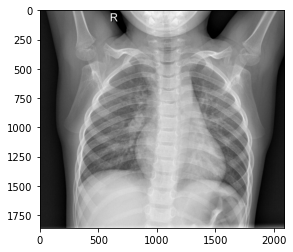

Normal X-ray


In [7]:
#loading the dataset 
traindir = r"C:\Users\ompra\CNN\chest_xray\train"
testdir = r"C:\Users\ompra\CNN\chest_xray\test"
Categories = ['NORMAL','PNEUMONIA']
category = 'NORMAL'
path = os.path.join(traindir, category)
for img in os.listdir(path):
    img_data = cv2.imread(os.path.join(path, img))
    plt.imshow(img_data, cmap = 'gray')
    plt.show()
    break
print('Normal X-ray')

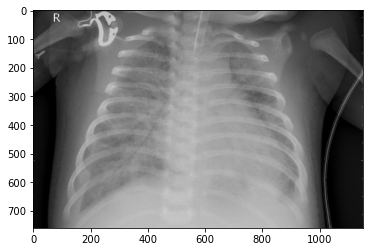

Peumonia X-ray


In [8]:
category = 'PNEUMONIA'
path = os.path.join(traindir, category)
for img in os.listdir(path):
    img_data = cv2.imread(os.path.join(path, img))
    plt.imshow(img_data, cmap = 'gray')
    plt.show()
    break
print('Peumonia X-ray')

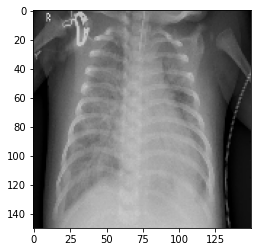

(150, 150, 3)


In [9]:
def resize_img(img_data):
    new_data = cv2.resize(img_data,(150,150))
    return new_data
new_data = resize_img(img_data)
plt.imshow(new_data, cmap= 'gray')
plt.show()
print(new_data.shape)

In [10]:
import random
training_data = []

def assign_label(img):
    label = -1
    type_x = img.split('-')[0]
    
    if type_x == 'NORMAL':
        label = 0
    elif type_x == 'BACTERIA':
        label = 1
    else:
        lable = 2
        
    return label
def load_train_data():
    for category in Categories:
        path = os.path.join(traindir, category)
        for img in os.listdir(path):
            label = assign_label(img)
            img_data = cv2.imread(os.path.join(path, img))
            new_data = resize_img(img_data)
            training_data.append([new_data,label])
load_train_data()
random.shuffle(training_data)

In [11]:
testing_data = []

def load_test_data():
    for category in Categories:
        path = os.path.join(testdir, category)
        for img in os.listdir(path):
            label = assign_label(img)
            img_data = cv2.imread(os.path.join(path, img))
            new_data = resize_img(img_data)
            testing_data.append([new_data,label])
load_test_data()
random.shuffle(testing_data)

In [12]:
X_train,X_test = [],[]
y_train,y_test = [],[]

def convert2np(data_arr):
    X,y=[],[]
    for data, label in data_arr:
        X.append(data)
        y.append(label)
    X = np.array(X).reshape(-1,150,150,3)
    y = np.array(y)
    
    X = X = ut.normalize(X,axis=1)
    
    return X,y
X_train, y_train = convert2np(training_data)
X_test,y_test = convert2np(testing_data)

In [13]:
import pickle

pickle_out = open('X_train.pickle','wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open('y_train.pickle','wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out = open('X_test.pickle','wb')
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open('y_test.pickle','wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()